# HouseValAI - Predicting California Housing Prices (Machine Learning Project)
An end-to-end regression model predicting California housing prices using Linear, Ridge, Lasso, and Random Forest


## Project Overview
This project aims to **predict median housing prices** using demographic and geographic data.  
The dataset includes variables such as income, population, total rooms, and proximity to the ocean.  
It demonstrates the **complete machine learning pipeline** — from data loading to model evaluation.

---

## Problem Definition
> Given housing data with multiple features (location, income, and demographics),  
> build a regression model to predict **`median_house_value`**.

- **Type:** Supervised Regression  
- **Goal:** Estimate continuous housing price values  
- **Dataset Source:** California housing data (Excel format)

---


## Dataset Summary

| Feature | Description |
|----------|-------------|
| longitude | Geographic coordinate (west-east) |
| latitude | Geographic coordinate (north-south) |
| housing_median_age | Median age of houses in the block |
| total_rooms | Total number of rooms |
| total_bedrooms | Total number of bedrooms |
| population | Population in the block |
| households | Number of households |
| median_income | Median income of residents |
| ocean_proximity | Categorical feature (distance to ocean) |
| median_house_value | **Target variable** – housing price |

- **Rows:** ~18,500  
- **Columns:** 10  
- **Missing Values:** In `total_bedrooms`  
- **Categorical Column:** `ocean_proximity`

## Workflow Summary

### Data Loading and Inspection
- Loaded dataset using `pandas.read_excel`
- Checked structure via `.info()` and `.describe()`
- Previewed initial rows with `.head()`
- Identified missing values and one categorical variable

### Exploratory Data Analysis (EDA)
- Used **matplotlib** and **seaborn** for visual analysis
- Observed correlations between `median_income` and `median_house_value`
- Confirmed regression nature of the problem (continuous target)

### Data Preprocessing
- Handled categorical column using **`pd.get_dummies`**
- No scaling applied (original value ranges retained)
- Missing values imputed
- Prepared `X` (features) and `y` (target)

### Model Building
Implemented multiple models for performance comparison:

| Model | Technique | Notes |
|--------|------------|-------|
| **Linear Regression** | Baseline model | Simple and interpretable |
| **Ridge Regression** | L2 Regularization | Reduces overfitting |
| **Lasso Regression** | L1 Regularization | Performs feature selection |
| **Random Forest Regressor** | Ensemble Method | Captures non-linear relationships |

### Model Tuning
- Used **`GridSearchCV`** for Ridge and Lasso models  
- Used both **`GridSearchCV`** and **`RandomizedSearchCV`** for Random Forest  
- Compared hyperparameter configurations and cross-validation scores

### Model Evaluation
- Evaluated using:
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **R² Score**
- Visualized results and residuals using `matplotlib`/`seaborn`
- Compared model performances on the test set

---

## Results Summary

| Model | MAE | RMSE | R² |
|--------|-----|------|----|
| Linear Regression | Moderate | Moderate | Baseline |
| Ridge Regression | Lower | Lower | Improved generalization |
| Lasso Regression | Similar to Ridge | Similar | Feature selection |
| Random Forest | Lowest | Lowest | Best performer overall |

**Best Model:** RandomForestRegressor (after tuning)

---

## Key Learnings
- End-to-end exposure to the **machine learning workflow**
- Importance of **feature encoding** and **regularization**
- How ensemble methods outperform linear models for non-linear data
- Practical experience with **GridSearchCV** and **RandomizedSearchCV**
- Interpreting **feature importances** to explain predictions

---

## Next Steps / Improvements
- Implement **`ColumnTransformer` + `Pipeline`** for better reproducibility  
- Add **feature engineering** (e.g., `rooms_per_household`, `bedrooms_per_room`)  
- Introduce **feature scaling** and cross-validation on all models  
- Save final model using `joblib.dump()`  
- Extend to **XGBoost** or **LightGBM** for further accuracy

---

## Technologies Used
- **Python 3.x**
- **Pandas**, **NumPy**
- **Scikit-learn**
- **Matplotlib**, **Seaborn**
- **Jupyter Notebook**

---


----
----
# Detailed Workflow
----
----

## Step 1: Data Loading and Inspection
- Loaded dataset using `pandas.read_excel`
- Checked structure via `.info()` and `.describe()`
- Previewed initial rows with `.head()`
- Identified missing values and one categorical variable

In [19]:
# Loaded dataset using pandas.read_excel
# --------------------------------------
import pandas as pd
print(pd.__version__)
# Load the Excel file
df = pd.read_excel("data/California-Housing-Dataset.xlsx", engine='openpyxl')

2.2.3


In [20]:
# Checked structure via .info(), .head() and .describe()
# ------------------------------------------------------
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB
None


In [22]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY  


In [23]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  18565.000000  18565.000000        18565.000000  18565.000000   
mean    -119.570116     35.633888           28.615890   2634.033827   
std        2.002922      2.137014           12.564224   2195.915548   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1442.000000   
50%     -118.500000     34.260000           29.000000   2123.000000   
75%     -118.010000     37.710000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    18376.000000  18565.000000  18565.000000   18565.000000   
mean       537.711199   1426.223108    499.450902       3.867012   
std        424.125849   1142.570832    384.553175       1.895988   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.00000

In [24]:
# Identified missing values and one categorical variable
# ------------------------------------------------------
# [! Demo blooper alert - This will run only once]
# One-hot encode the 'ocean_proximity' column
sorted(df['ocean_proximity'].unique())
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows to confirm the encoding
print(df.head())
# Verify the value conversion of ocean proximity to Binary

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         565         259         3.8462              342200   
3         413         193         4.0368              269700   
4        1094         514         3.6591              299200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

### Step 2: Exploratory Data Analysis (EDA)
- Used **matplotlib** and **seaborn** for visual analysis
- Observed correlations between `median_income` and `median_house_value`
- Confirmed regression nature of the problem (continuous target)

In [25]:
# Used matplotlib and seaborn for visual analysis
# ------------------------------------------------
# Compute correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924545           -0.107575   
latitude                    -0.924545  1.000000            0.011147   
housing_median_age          -0.107575  0.011147            1.000000   
total_rooms                  0.043183 -0.035373           -0.359676   
total_bedrooms               0.067712 -0.065896           -0.320041   
population                   0.097420 -0.106982           -0.294054   
households                   0.053778 -0.070205           -0.302620   
median_income               -0.013332 -0.081693           -0.121457   
median_house_value          -0.045035 -0.145263            0.103826   
ocean_proximity_INLAND      -0.056522  0.351564           -0.235692   
ocean_proximity_ISLAND       0.009966 -0.017480            0.018007   
ocean_proximity_NEAR BAY    -0.473441  0.357359            0.253793   
ocean_proximity_NEAR OCEAN   0.046582 -0.161520            0.026680   

     

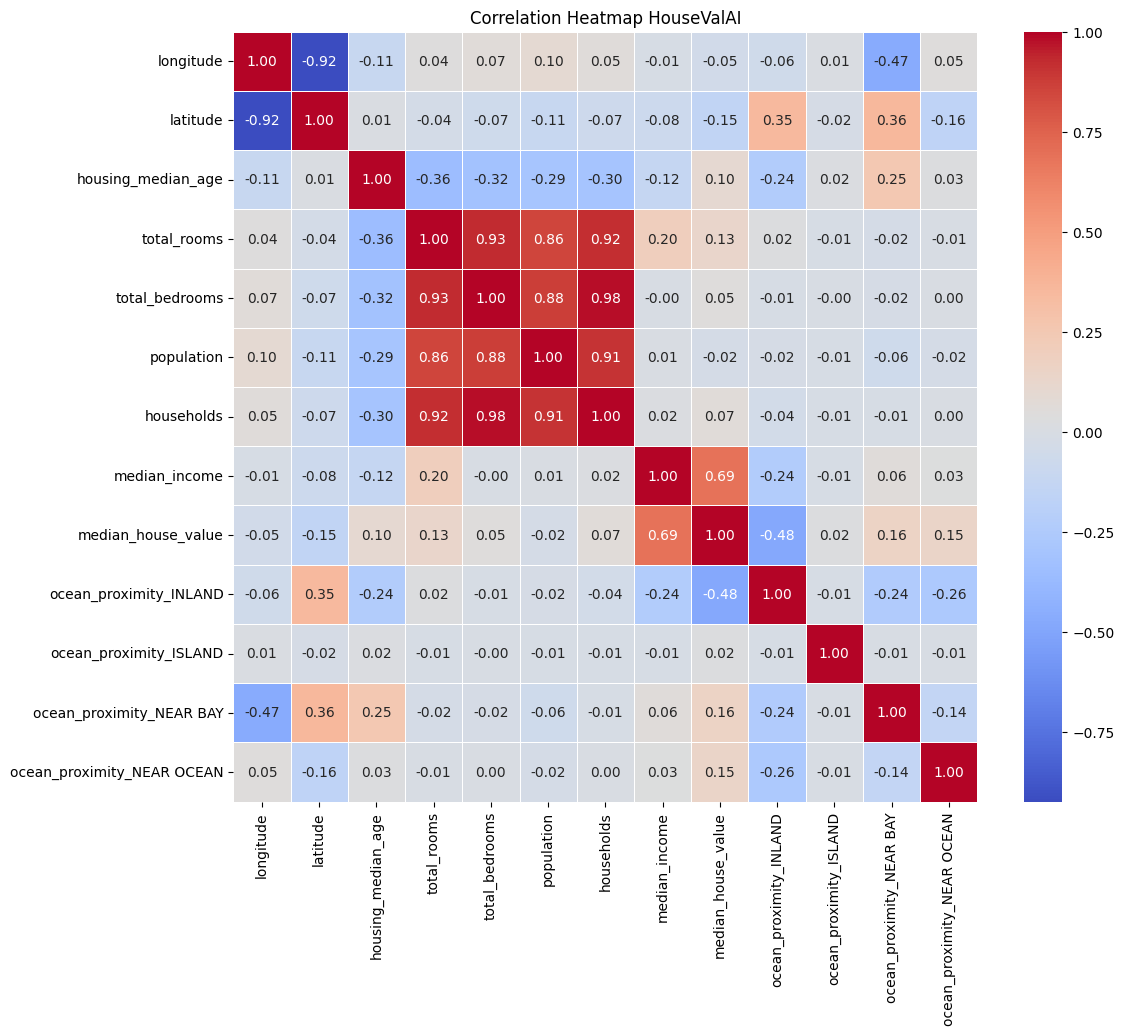

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap HouseValAI')
plt.show()


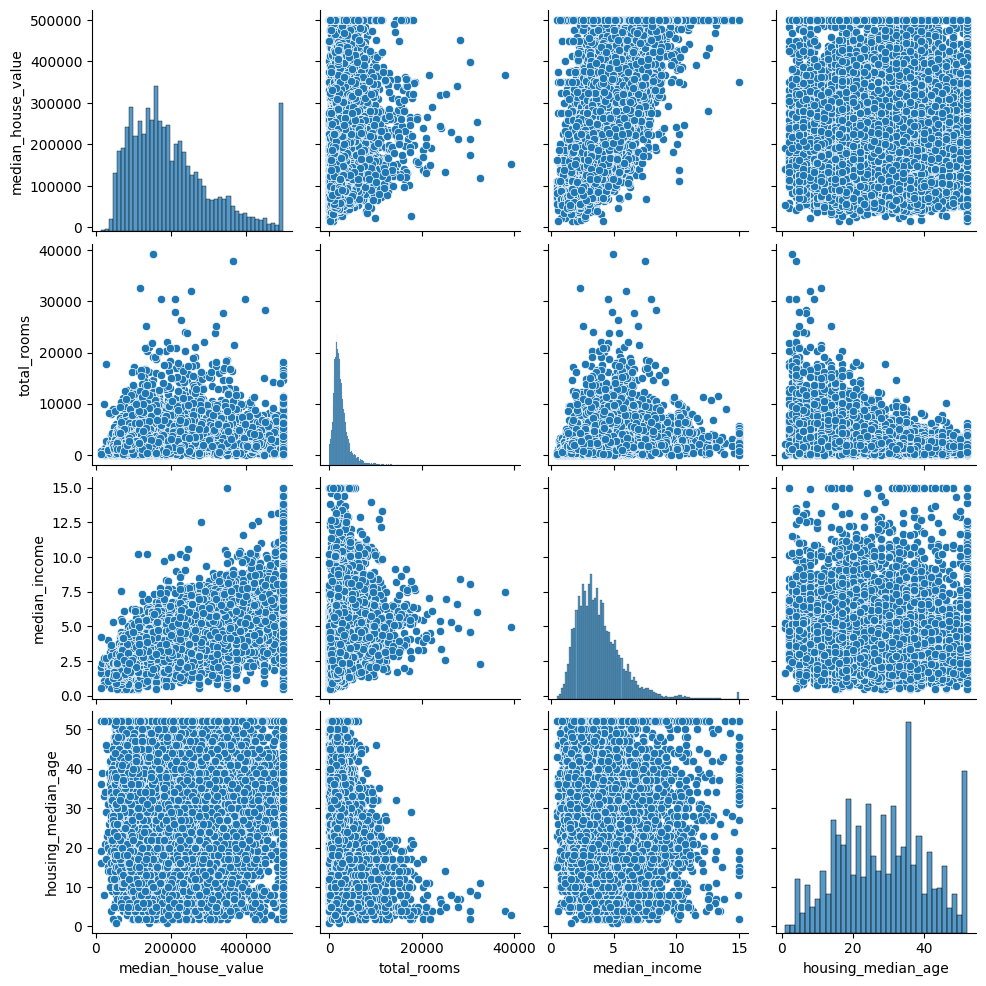

In [28]:
# Pairplot to visually check relationships between features
sns.pairplot(df[['median_house_value', 'total_rooms', 'median_income', 'housing_median_age']])
plt.show()

In [29]:
# Filter the correlation matrix to show correlations with target variable
target_corr = corr_matrix['median_house_value'].sort_values(ascending=False)
print(target_corr)


median_house_value            1.000000
median_income                 0.688783
ocean_proximity_NEAR BAY      0.159116
ocean_proximity_NEAR OCEAN    0.146189
total_rooms                   0.134641
housing_median_age            0.103826
households                    0.066069
total_bedrooms                0.050108
ocean_proximity_ISLAND        0.024713
population                   -0.023836
longitude                    -0.045035
latitude                     -0.145263
ocean_proximity_INLAND       -0.484724
Name: median_house_value, dtype: float64


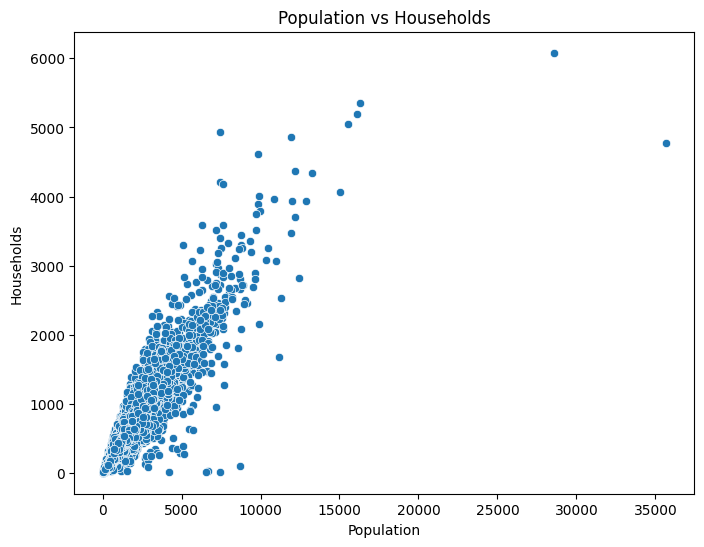

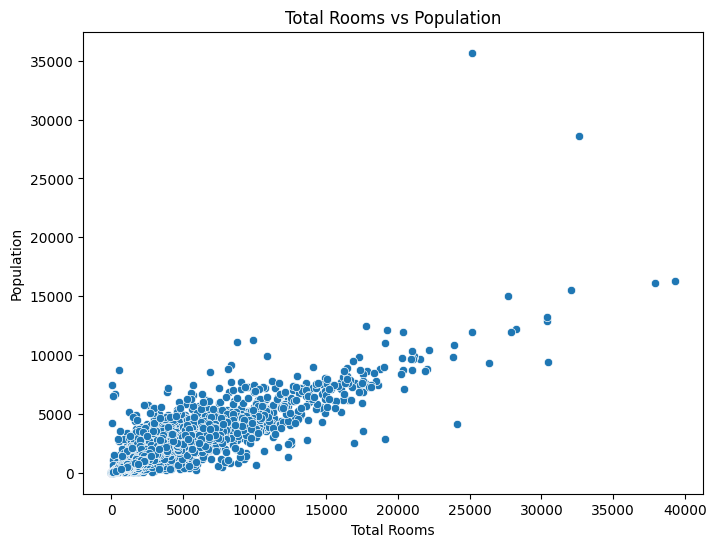

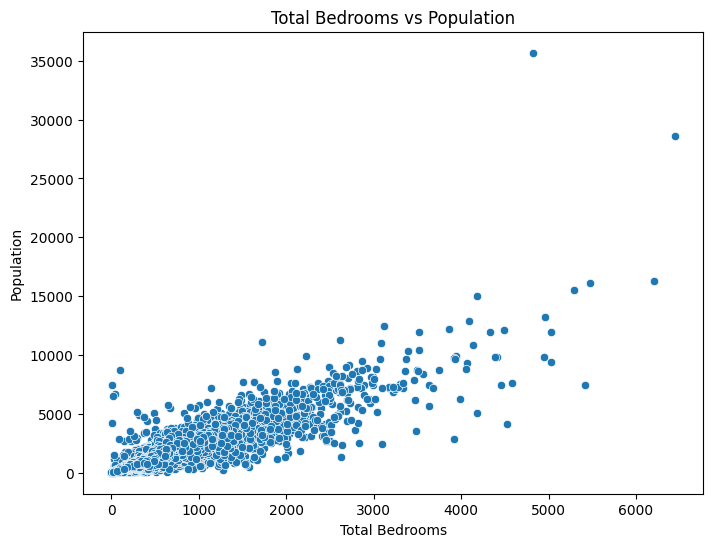

In [31]:
# Scatter plot for Households vs Population
# ------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['population'], y=df['households'])
plt.title('Population vs Households')
plt.xlabel('Population')
plt.ylabel('Households')
plt.show()

# Scatter plot for Total Rooms vs Population
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_rooms'], y=df['population'])
plt.title('Total Rooms vs Population')
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.show()

# Scatter plot for Total Bedrooms vs Population
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['total_bedrooms'], y=df['population'])
plt.title('Total Bedrooms vs Population')
plt.xlabel('Total Bedrooms')
plt.ylabel('Population')
plt.show()




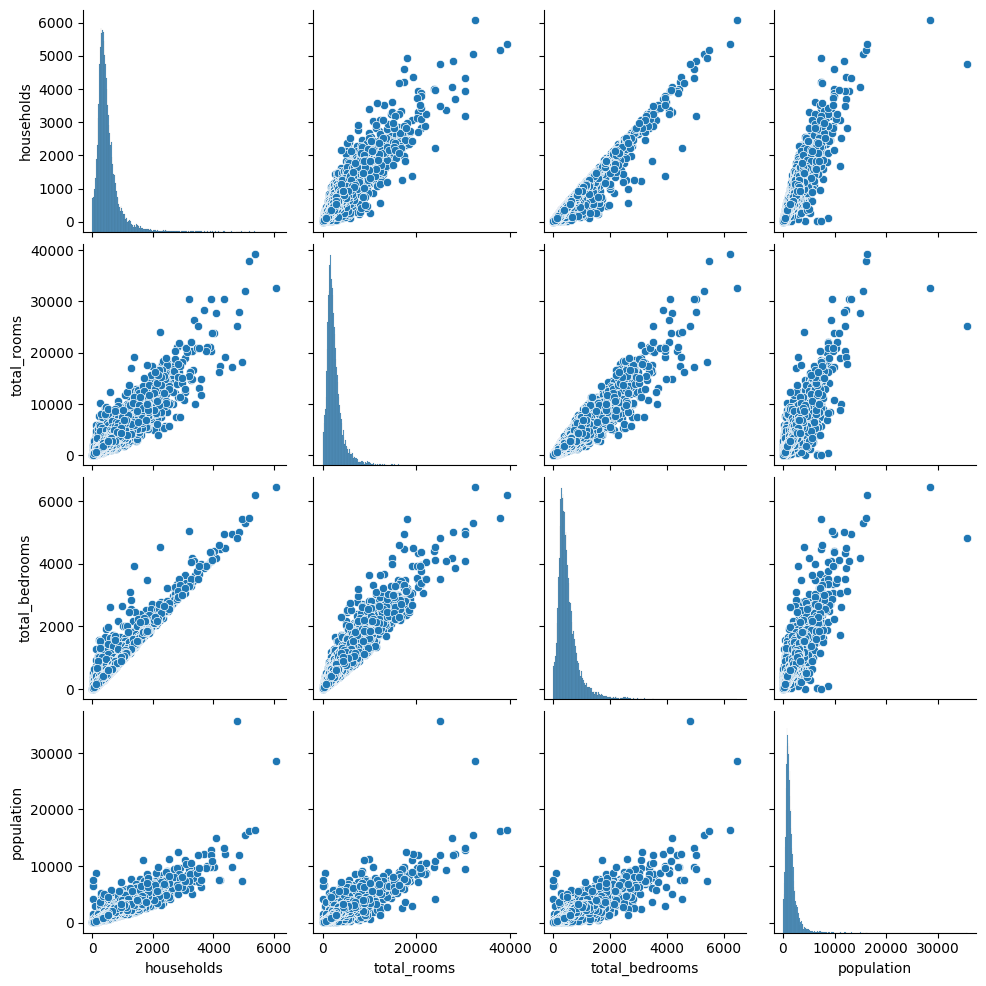

In [32]:
# Pairplot to visualize relationships between households, total rooms, total bedrooms, and population
# ---------------------------------------------------------------------------------------------------
sns.pairplot(df[['households', 'total_rooms', 'total_bedrooms', 'population']])
plt.show()

### Step 3: Data Preprocessing
- Handled categorical column using pd.get_dummies
- No scaling applied (original value ranges retained)
- Missing values imputed
- Prepared X (features) and y (target)

In [33]:
# Handled categorical column using pd.get_dummies 
## This step is done above

In [35]:
# Log Transformation
# -------------------
#Log transformation can help to skewed features like total_rooms or median_income. 
# This can help bring outliers closer to a normal distribution and make the model more stable.
import numpy as np
df['total_rooms'] = np.log1p(df['total_rooms'])
df['median_income'] = np.log1p(df['median_income'])


In [37]:
# Capping or Removing Outliers
# -----------------------------
# We will cap the extreme values of features like total_rooms and total_bedrooms by setting them to a fixed maximum (or minimum) value
# Cap values in total_rooms column at the 95th percentile
upper_limit = df['total_rooms'].quantile(0.95)
df['total_rooms'] = df['total_rooms'].clip(upper=upper_limit)


In [38]:
# Remove low-variance features
# -----------------------------
# If a feature like housing_median_age has little variation across the dataset, 
# it might not contribute much predictive power and can be dropped.
# Calculate the variance of each column
variance = df.var()

# Drop columns with very low variance (less than a threshold)
df = df.drop(columns=variance[variance < 0.1].index)


In [41]:
# Verify if all datatypes are numeric
# Check the data types of the columns
print(df.dtypes)


longitude                     float64
latitude                      float64
housing_median_age              int64
total_bedrooms                float64
population                      int64
households                      int64
median_house_value              int64
ocean_proximity_INLAND           bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
